## <b>1 <span style='color:#e61227'>|</span> Introduction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> YOLOv8 and Object Detection Task </b></p>
</div>

**YOLO (You Only Look Once)** is a popular family of **object detection** models known for their speed and accuracy. **YOLOv8**, the latest version, improves upon its predecessors with enhanced architecture and performance. **Object detection** involves identifying and localizing objects within images, making it crucial for applications like medical imaging, where precise localization of anomalies, such as brain tumors, is essential!!


# New Section

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.2 |</span></b> Study Aim </b></p>
</div>

The primary objective of this work is to develop a robust and accurate model for detecting brain tumors from **MRI images** using the **YOLOv8 algorithm**. By training on a custom dataset, the model aims to assist in early diagnosis and treatment planning, ultimately improving patient outcomes!

In [ ]:
!pip install kaggle
from google.colab import files
print("Please upload your kaggle.json file from Kaggle account settings.")
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pkdarabi/medical-image-dataset-brain-tumor-detection
import zipfile
import os
dataset_zip = 'medical-image-dataset-brain-tumor-detection.zip'
output_dir = '/content/brain_tumor_dataset'
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print("Dataset extracted to:", output_dir)

#
files = os.listdir(output_dir)
print("Files in the dataset directory:", files)


Please upload your kaggle.json file from Kaggle account settings.


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 96% 285M/297M [00:01<00:00, 193MB/s]
100% 297M/297M [00:04<00:00, 66.1MB/s]
Dataset extracted to: /content/brain_tumor_dataset
Files in the dataset directory: ['BrainTumor']




```
`# This is formatted as code`
```

## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b>

In [ ]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [ ]:
# Import Essential Librariesimport os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## <b>3 <span style='color:#e61227'>|</span> Loading YOLOv8 Pre-trained Model </b>


In [ ]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 60.6MB/s]


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Train and Fine-tuning YOLOv8 and Important Hyperparameters </b></p>
</div>

### Fine-tuning the YOLOv8 model involves adjusting various hyperparameters to optimize performance for the specific task of brain tumor detection. Key hyperparameters include:

- Learning Rate: Controls the step size during optimization. A lower learning rate ensures slower, more stable updates.
- Batch Size: Number of images processed in one iteration. Affects memory usage and convergence speed.
- Epochs: Number of complete passes through the training dataset.
- Optimizer: Algorithm used to minimize the loss function. Choices include SGD, Adam, and others.
- Patience: Number of epochs with no improvement after which training is stopped early.

### Train Model

- Training the model involves feeding the custom dataset into the YOLOv8 algorithm, allowing it to learn to identify and localize tumors in MRI images. This process is iterative, with the model refining its predictions over multiple epochs.

In [ ]:
# Define the dataset_path
yaml_file_path = '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/data.yaml'

# Train the model on our custom dataset
results = T_Model.train(
    data=yaml_file_path,
    epochs=70,
    batch=64,
    optimizer='AdamW',
    lr0=0.001,  # Initial learning rate
    lrf=0.2     # Final learning rate fraction
)


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/data.yaml, epochs=70, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 43.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 190MB/s]


AMP: checks passed ✅


train: Scanning /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:01<00:00, 1633.05it/s]

train: New cache created: /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:01<00:00, 530.82it/s]


val: New cache created: /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      8.32G      1.378      3.614      1.421         63        640: 100%|██████████| 34/34 [00:38<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.98s/it]

                   all        612        612      0.154      0.146      0.102     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      7.99G      1.222      1.873      1.306         53        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

                   all        612        612      0.413      0.368       0.37      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      7.99G      1.215       1.58      1.295         50        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all        612        612      0.489      0.146      0.152     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      7.99G      1.247      1.485      1.312         53        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]

                   all        612        612     0.0252      0.457       0.03     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      7.99G      1.205      1.436      1.291         52        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]

                   all        612        612      0.478      0.425      0.453      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      7.99G       1.17      1.361      1.283         43        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


                   all        612        612       0.45      0.404      0.384      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      7.99G      1.137       1.32      1.253         53        640: 100%|██████████| 34/34 [00:35<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.29s/it]

                   all        612        612      0.588      0.466      0.534      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      7.99G      1.113       1.19       1.24         46        640: 100%|██████████| 34/34 [00:35<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]

                   all        612        612      0.493      0.458      0.443      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      7.99G      1.117      1.182      1.247         52        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.37s/it]

                   all        612        612      0.507      0.435      0.436      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      7.99G      1.093      1.172      1.228         54        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

                   all        612        612      0.717      0.691      0.722      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      7.99G       1.11      1.131      1.224         50        640: 100%|██████████| 34/34 [00:34<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]

                   all        612        612      0.693      0.658      0.711      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      7.99G       1.08      1.088      1.221         58        640: 100%|██████████| 34/34 [00:35<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]

                   all        612        612      0.693       0.65      0.705      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      7.99G      1.062      1.057      1.205         45        640: 100%|██████████| 34/34 [00:35<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.35s/it]

                   all        612        612      0.668      0.586      0.685      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      7.99G      1.055      1.037      1.201         58        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.35s/it]

                   all        612        612      0.804      0.702      0.775       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      7.99G      1.028       1.01      1.185         50        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]

                   all        612        612      0.733      0.686      0.747      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      7.99G      1.047      1.012      1.202         42        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all        612        612      0.833      0.705      0.803       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      7.99G      1.008     0.9497       1.17         53        640: 100%|██████████| 34/34 [00:35<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]

                   all        612        612      0.832      0.781      0.838      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      7.99G      1.024     0.9359      1.185         49        640: 100%|██████████| 34/34 [00:34<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all        612        612      0.718      0.709      0.756       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      7.99G      1.005     0.9268      1.173         59        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.803      0.732      0.805      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      7.99G      1.015     0.9592      1.183         44        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all        612        612      0.717      0.653       0.73      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      7.99G     0.9839     0.9015       1.16         51        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all        612        612      0.732       0.71      0.778      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      7.99G     0.9732     0.8962      1.163         45        640: 100%|██████████| 34/34 [00:35<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612       0.81      0.764      0.827      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      7.99G     0.9756     0.8802      1.154         64        640: 100%|██████████| 34/34 [00:34<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]

                   all        612        612      0.823      0.758       0.82      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      7.99G     0.9831     0.8721      1.161         57        640: 100%|██████████| 34/34 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        612        612      0.774      0.707      0.806      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      7.99G     0.9664     0.8336      1.147         47        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        612        612        0.8      0.776      0.829       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      7.99G     0.9682     0.8511       1.15         48        640: 100%|██████████| 34/34 [00:34<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

                   all        612        612      0.833      0.799      0.857      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      7.99G      0.954     0.8358      1.146         47        640: 100%|██████████| 34/34 [00:35<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        612        612      0.842      0.803      0.859      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      7.99G     0.9478     0.8044      1.148         59        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]

                   all        612        612      0.804      0.689      0.764      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      7.99G     0.9094     0.7815      1.104         40        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all        612        612      0.778      0.775      0.821      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      7.99G      0.937     0.7803      1.125         58        640: 100%|██████████| 34/34 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.787      0.747        0.8      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      7.99G     0.9337     0.7768       1.13         57        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]

                   all        612        612      0.871      0.829      0.898      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      7.99G     0.9297      0.772      1.123         56        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]

                   all        612        612      0.737      0.712       0.75      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      7.99G     0.9199      0.761      1.112         53        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]

                   all        612        612      0.833      0.813      0.856      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      7.99G     0.8901     0.7267      1.101         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]

                   all        612        612      0.798      0.727      0.795      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      7.99G     0.9163     0.7375      1.112         64        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]

                   all        612        612      0.826      0.784      0.831      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      7.99G     0.9003     0.7386      1.114         51        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all        612        612      0.853      0.782      0.854      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      7.99G     0.8706     0.7035      1.087         54        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.68s/it]

                   all        612        612      0.882      0.845      0.895      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      7.99G     0.8731     0.6798      1.097         50        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.853       0.79      0.852      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      7.99G     0.8647     0.7076      1.083         48        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]

                   all        612        612      0.861      0.802       0.87      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      7.99G     0.8663     0.6962      1.089         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]

                   all        612        612      0.842      0.838      0.881      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      7.99G     0.8644     0.6741      1.086         55        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]

                   all        612        612      0.846      0.854      0.885      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      7.99G     0.8517     0.6758      1.082         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

                   all        612        612      0.881      0.801      0.885      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      7.99G     0.8346     0.6585      1.071         49        640: 100%|██████████| 34/34 [00:35<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        612        612      0.851      0.816      0.878      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      7.99G     0.8366     0.6432      1.069         43        640: 100%|██████████| 34/34 [00:35<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

                   all        612        612      0.876      0.775      0.877      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      7.99G     0.8308      0.636      1.066         54        640: 100%|██████████| 34/34 [00:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

                   all        612        612      0.899      0.811      0.887      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      7.99G     0.8236     0.6462      1.063         43        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]

                   all        612        612      0.894      0.822      0.889      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      7.99G     0.8334     0.6269      1.071         49        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all        612        612      0.859      0.772      0.846      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      7.99G     0.8369     0.6332      1.069         45        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

                   all        612        612      0.847      0.836      0.893      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      7.99G     0.8183     0.6229      1.061         52        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]

                   all        612        612       0.88      0.835      0.901      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      7.99G     0.8294     0.6224      1.055         54        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

                   all        612        612      0.886       0.79      0.882      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      7.99G     0.8024     0.6099      1.045         54        640: 100%|██████████| 34/34 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]

                   all        612        612      0.896      0.831      0.899      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      7.99G     0.8083     0.6033      1.057         58        640: 100%|██████████| 34/34 [00:32<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]

                   all        612        612      0.903      0.847      0.919      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      7.99G     0.7977      0.599      1.053         58        640: 100%|██████████| 34/34 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

                   all        612        612      0.878      0.807      0.878      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      7.99G     0.7972     0.5903      1.052         50        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]

                   all        612        612      0.893       0.86      0.914      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      7.99G     0.8026     0.5933      1.042         52        640: 100%|██████████| 34/34 [00:35<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        612        612      0.888      0.866      0.913      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      7.99G     0.7727     0.5704      1.033         43        640: 100%|██████████| 34/34 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all        612        612      0.885      0.872      0.934      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      7.99G     0.7783     0.5712      1.041         55        640: 100%|██████████| 34/34 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]

                   all        612        612      0.884      0.886      0.921      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      7.99G      0.771     0.5512      1.038         42        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]

                   all        612        612      0.926      0.852      0.918      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      7.99G     0.7735     0.5575       1.03         51        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]

                   all        612        612      0.907      0.841       0.91      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      7.99G     0.7701     0.5521      1.034         58        640: 100%|██████████| 34/34 [00:34<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]

                   all        612        612      0.894      0.862      0.927        0.7


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      7.99G     0.6932     0.4567     0.9747         31        640: 100%|██████████| 34/34 [00:37<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        612        612      0.867       0.86      0.911      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      7.99G     0.6706     0.4331     0.9575         32        640: 100%|██████████| 34/34 [00:32<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.29s/it]

                   all        612        612      0.867      0.845      0.903      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      7.99G     0.6522     0.4001     0.9471         32        640: 100%|██████████| 34/34 [00:30<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

                   all        612        612      0.869      0.867      0.909      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      7.99G     0.6407      0.392     0.9495         32        640: 100%|██████████| 34/34 [00:30<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]

                   all        612        612        0.9      0.894      0.928       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      7.99G     0.6337     0.3839      0.941         32        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all        612        612      0.915      0.873      0.924      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      7.99G     0.6156     0.3726     0.9298         32        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        612        612      0.874      0.891      0.928      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      7.99G     0.6229     0.3798     0.9347         32        640: 100%|██████████| 34/34 [00:30<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all        612        612      0.917      0.855      0.927       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      7.99G     0.6026     0.3611     0.9224         31        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.917      0.855      0.925      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      7.99G     0.5867     0.3434     0.9151         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

                   all        612        612      0.923      0.852      0.922      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      7.99G     0.5951     0.3515     0.9146         31        640: 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]

                   all        612        612      0.929      0.842      0.923      0.707



70 epochs completed in 0.824 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.40s/it]


                   all        612        612      0.875      0.892      0.928      0.711
                glioma        285        285      0.802      0.793      0.838       0.55
            meningioma        142        142      0.957      0.936      0.979      0.832
             pituitary        185        185      0.866      0.947      0.968      0.751
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!cp -r runs /content/drive/MyDrive/runs_yolo

## <b>4 <span style='color:#e61227'>|</span> Model Performance Evaluation</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.1 |</span></b> Important Metrics for YOLOv8 </b></p>
</div>

Evaluating the model involves measuring its performance on a validation set. Key metrics include **precision**, **recall**, and **mean Average Precision (mAP)**, which collectively provide a comprehensive view of the models accuracy and reliability.

- Precision: Ratio of correctly predicted positive observations to total predicted positives. High precision indicates fewer false positives.
- Recall: Ratio of correctly predicted positive observations to all actual positives. High recall indicates fewer false negatives.
- mAP50: Mean Average Precision at 50% IoU. Measures accuracy at a single IoU threshold.
- mAP50-95: Mean Average Precision across multiple IoU thresholds, providing a more comprehensive measure of performance.
- IoU (Intersection Over Union): Measures overlap between predicted and ground truth bounding boxes.

In [ ]:
# Define the path to the directory
# Import Essential Libraries
import os # Import the os module
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
post_training_files_path = '/content/drive/MyDrive/runs_yolo/runs/detect/train3'

# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.96it/s]


                   all        612        612      0.876      0.889      0.928      0.712
                glioma        285        285      0.807      0.792      0.838      0.552
            meningioma        142        142      0.957      0.935      0.979      0.835
             pituitary        185        185      0.866       0.94      0.968      0.748
Speed: 2.1ms preprocess, 4.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
import pandas as pd

# Access the metrics dictionary directly
metrics_dict = metrics.results_dict  # No parentheses here
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
print(metrics_df)


                      Metric Value
metrics/precision(B)      0.876427
metrics/recall(B)         0.888961
metrics/mAP50(B)          0.928412
metrics/mAP50-95(B)       0.711814
fitness                   0.733474


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.2 |</span></b> Visualization Results </b></p>
</div>

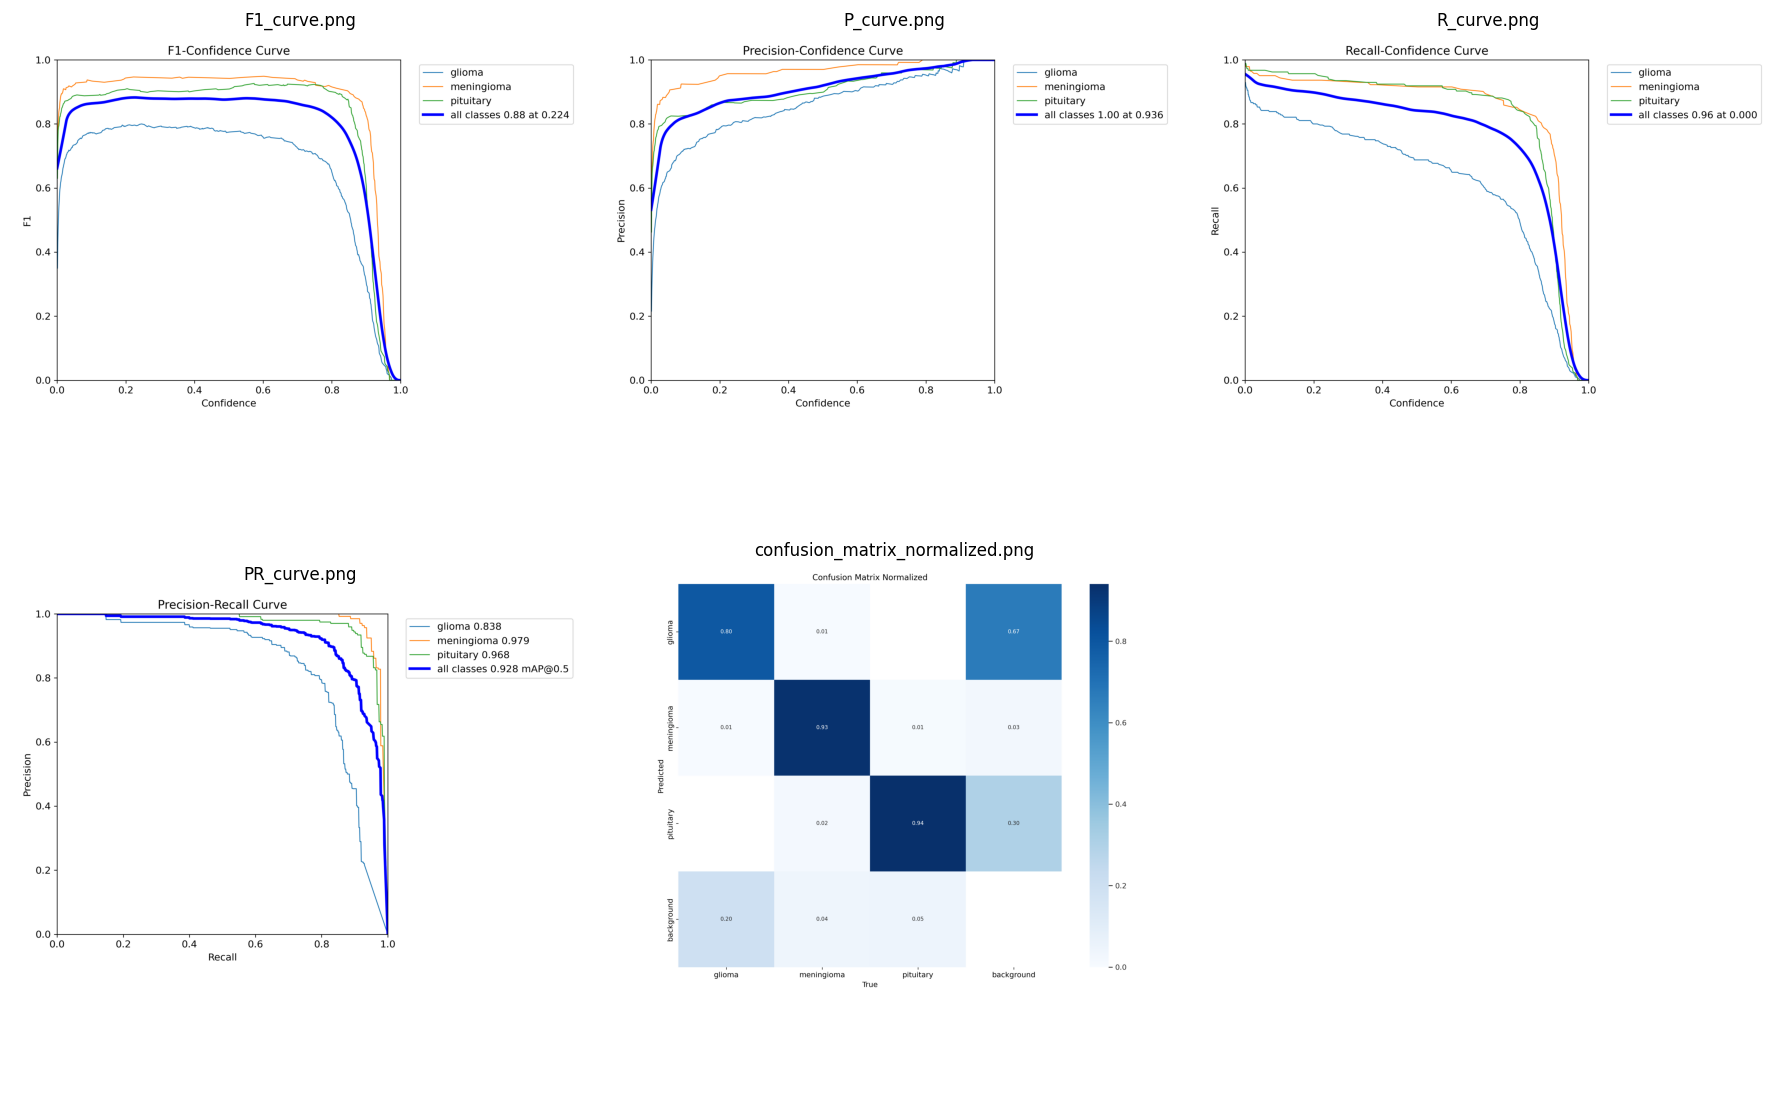

In [ ]:
def display_images_in_frame_with_background(post_training_files_path, image_files, background_color='lightgray'):
    # Calculate grid size (rows and columns)
    num_images = len(image_files)
    cols = 3  # Number of columns (you can adjust this as needed)
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

    # Set up the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), dpi=120)
    fig.patch.set_facecolor(background_color)  # Set the figure background color
    axes = axes.flatten()  # Flatten to easily index

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_file, fontsize=10, color='black')  # Add title with black text

    # Turn off unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# List of image files to display
image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'confusion_matrix_normalized.png',

]

# Path to the directory containing the images
post_training_files_path = '/content/drive/MyDrive/runs_yolo/runs/detect/train3'
# Display the images with a background color
display_images_in_frame_with_background(post_training_files_path, image_files, background_color='white')


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>4.3 |</span></b> Inference Model on Unseen Images </b></p>
</div>

Processing image 1/16: 2728_jpg.rf.b04df2c64856f68a0cf4c075ff0539e5.jpg

0: 640x640 1 glioma, 689.0ms
Speed: 10.7ms preprocess, 689.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Processing image 2/16: 149_jpg.rf.9bb4fe987674ac37bfa59046107461b2.jpg

0: 640x640 1 meningioma, 657.1ms
Speed: 3.8ms preprocess, 657.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Processing image 3/16: 431_jpg.rf.bc347f3a6882c2727fda056a6edebc0b.jpg

0: 640x640 1 meningioma, 713.7ms
Speed: 3.7ms preprocess, 713.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Processing image 4/16: 2037_jpg.rf.4cc13f9ee6bf6b992c3e09547c9557a4.jpg

0: 640x640 1 glioma, 797.6ms
Speed: 21.9ms preprocess, 797.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Processing image 5/16: 2115_jpg.rf.6c0e37ceb10f6b65e87b6abd65199ec4.jpg

0: 640x640 1 glioma, 799.7ms
Speed: 8.5ms preprocess, 799.7ms inference, 1.3ms postprocess per image at shape (1, 3, 64

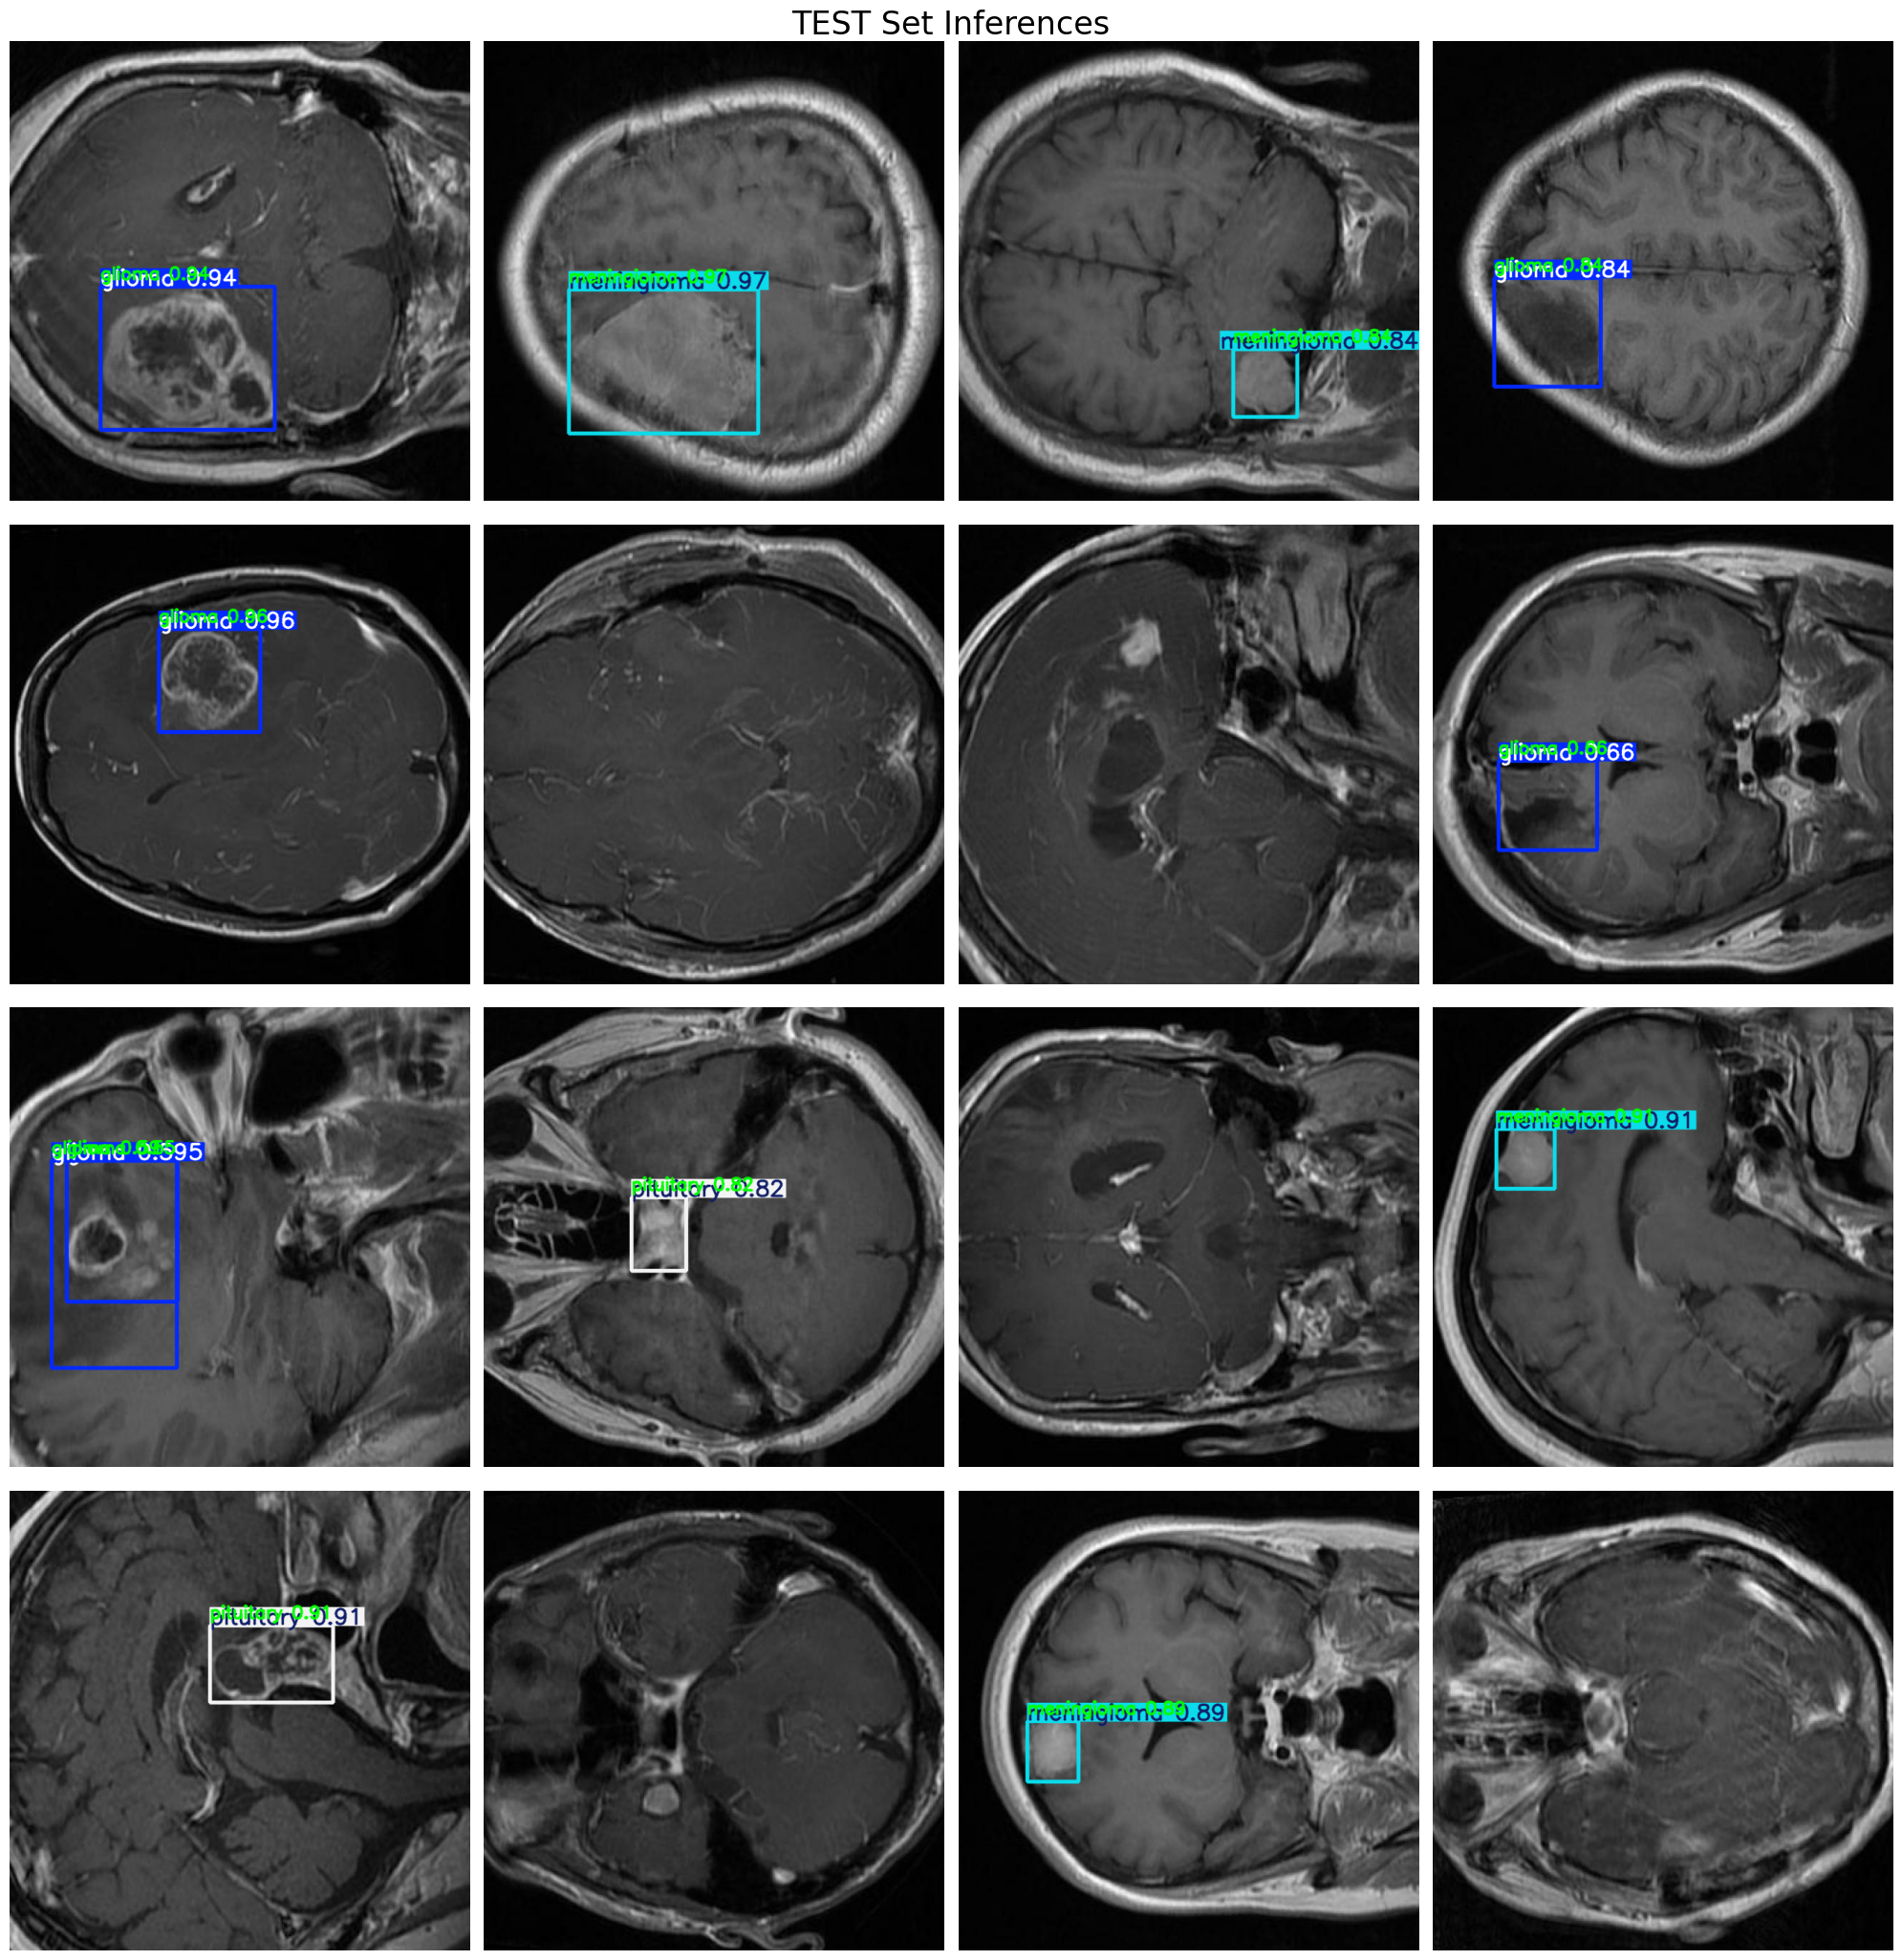

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Main inference script
def main():
    # Path to validation images
    dataset_path = '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8'  # Update to your dataset path
    valid_images_path = os.path.join(dataset_path, 'test', 'images')

    # List all JPG images in the directory
    image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

    # Check if there are images in the directory
    if len(image_files) == 0:
        print("No images found in the directory.")
        return

    # Select 16 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 16)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)][:16]  # Limit to 16 images

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle('TEST Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            try:
                # Load image
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image: {image_path}")
                    continue

                # Resize and normalize image
                resized_image = resize_image(image, size=(640, 640))
                normalized_image = normalize_image(resized_image)

                # Convert normalized image to uint8 for prediction
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Perform inference with the model
                print(f"Processing image {i+1}/{len(selected_images)}: {selected_images[i]}")
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with bounding boxes
                annotated_image = results[0].plot(line_width=3)  # Thicker bounding boxes
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

                # Annotate with class labels and confidence scores
                for box in results[0].boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
                    label = box.cls  # Class label
                    text = f"{results[0].names[int(label)]} {box.conf[0]:.2f}"  # Label with confidence
                    cv2.putText(
                        annotated_image_rgb, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA
                    )

                ax.imshow(annotated_image_rgb)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
        ax.axis('off')

    # Adjust layout and show results
    plt.tight_layout()
    plt.show()


# Entry point
if __name__ == "__main__":
    try:
        # Load your pre-trained model (ensure `best_model` is properly initialized)
        # Example: from ultralytics import YOLO
        # best_model = YOLO('path/to/your/model.pt')

        # Run the main function
        main()
    except KeyboardInterrupt:
        print("\nScript interrupted by user.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


In [ ]:
!cp -r runs /content/drive/MyDrive/runs_backup


In [ ]:
!cp -r runs /content/drive/MyDrive/final_runs_backup


**GRAD-CAM++**

**ResNet50**


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator


from keras.models import load_model

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set the path to the directory containing the images
data_dir = '/content/brain_tumor_dataset/BrainTumorYolov8'

# Get a list of all the image filenames in the directories
test_files = os.listdir(os.path.join(data_dir, 'test', 'images'))  # Assuming images are in a subdirectory 'images'
train_files = os.listdir(os.path.join(data_dir, 'train', 'images'))  # Assuming images are in a subdirectory 'images'
val_files = os.listdir(os.path.join(data_dir, 'valid', 'images'))  # Assuming images are in a subdirectory 'images'

# Create a list of dictionaries, where each dictionary contains the image filename, its path, and its label
data_list = []
for filename in test_files:
    data_list.append({'path': os.path.join(data_dir, 'test', 'images', filename), 'label': 0})  # Assuming '0' for test images
for filename in train_files:
    data_list.append({'path': os.path.join(data_dir, 'train', 'images', filename), 'label': 1})  # Assuming '1' for train images
for filename in val_files:  # Iterating through val_files now
    data_list.append({'path': os.path.join(data_dir, 'valid', 'images', filename), 'label': 2})  # Assuming '2' for validation images

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list).sample(frac=1, random_state=42)

# Convert 'label' column to strings
df['label'] = df['label'].astype(str)

train_df = df[:200]
val_df = df[200:253]

# Initialize ImageDataGenerator with desired preprocessing/augmentation
datagen = ImageDataGenerator(rescale=1. / 255)  # Example: rescale pixel values

train_ds = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Correct for two classes
)

val_ds = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 200 validated image filenames belonging to 3 classes.
Found 53 validated image filenames belonging to 3 classes.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Add this callback to reduce the learning rate if the validation loss doesn't improve
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Import the necessary modules from TensorFlow/Keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base model layers


# add new classification layer
# After many trials we obtained the best results with this classification head
base = base_model.output
gp = GlobalAveragePooling2D()(base)
dense_1 = Dense(1024, activation='relu')(gp)
# Apply BatchNormalization and Dropout to the dense_1 output
bn1 = BatchNormalization()(dense_1)
dropout1 = Dropout(0.5)(bn1)

dense_2 = Dense(512, activation='relu')(dropout1)
# Apply BatchNormalization and Dropout to the dense_2 output (optional)
bn2 = BatchNormalization()(dense_2)
dropout2 = Dropout(0.5)(bn2)

predictions = Dense(1, activation='sigmoid')(dropout2) #or dropout2 if you apply BatchNormalization and Dropout to the dense_2 output

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import Model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze ResNet50 layers to prevent re-training
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
]

In [ ]:
# Change the output layer to 3 neurons with softmax
predictions = Dense(3, activation='sigmoid')(dense_2)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile with categorical crossentropy
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Assuming you have a DataFrame 'df' with image paths and labels
# ... (your code to create df) ...

# Initialize ImageDataGenerator with desired preprocessing/augmentation
datagen = ImageDataGenerator(rescale=1. / 255)  # Example: rescale pixel values

# Create the train_generator
train_generator = datagen.flow_from_dataframe(
    dataframe=df,  # Replace 'df' with your actual DataFrame
    x_col="path",  # Replace 'path' with the column containing image paths
    y_col="label",  # Replace 'label' with the column containing labels
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Correct for multi-class classification
)

# Get the number of classes from the DataFrame
num_classes = df['label'].nunique()  # Get unique labels from DataFrame

# Or, you can get it from the ImageDataGenerator after calling flow_from_dataframe
#num_classes = train_generator.num_classes # Access num_classes from the generator

# Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)  # Use num_classes here

# Model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 3064 validated image filenames belonging to 3 classes.


In [ ]:
# Import necessary callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Now you can use EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_resnet_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# ... (rest of your code) ...

# Create the validation generator similar to the training generator
# Assuming 'df' is your DataFrame with image paths and labels
from sklearn.model_selection import train_test_split

# Split your DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Create the train_generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,  # Use train_df for training
    x_col="path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create the validation generator
val_generator = datagen.flow_from_dataframe(  # Use val_df for validation
    dataframe=val_df,  # Use val_df for validation
    x_col="path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
    # No need for subset='validation' since we're using val_df
)

batch_size = 32  # Assuming batch_size is 32

# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Evaluation
final_loss, final_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {final_accuracy:.4f}")
model.summary()
# Save Model
model.save('/content/drive/MyDrive/ml/final_resnet_model.keras')

Found 2451 validated image filenames belonging to 3 classes.
Found 613 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7027 - loss: 0.8220
Epoch 1: val_accuracy improved from -inf to 0.69408, saving model to best_resnet_model.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.7027 - loss: 0.8220 - val_accuracy: 0.6941 - val_loss: 0.8137 - learning_rate: 0.0010
Epoch 2/10
 1/76 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7812 - loss: 0.7510

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.69408
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7812 - loss: 0.7510 - val_accuracy: 0.6924 - val_loss: 0.8163 - learning_rate: 0.0010
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7094 - loss: 0.8069
Epoch 3: val_accuracy did not improve from 0.69408
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - accuracy: 0.7093 - loss: 0.8070 - val_accuracy: 0.6941 - val_loss: 0.8155 - learning_rate: 0.0010
Epoch 4/10
 1/76 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.6875 - loss: 0.8546
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: val_accuracy did not improve from 0.69408
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6875 - loss: 0.8546 - val_accuracy: 0.6941 - val_loss: 0.8154 - learning_rate: 0.0010
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6891 - loss: 0.8353
Epoch 5: val_accuracy did not improve from 0.69408
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/s

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,739,595 (102.00 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,101,256 (8.02 MB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 133s 13s/step


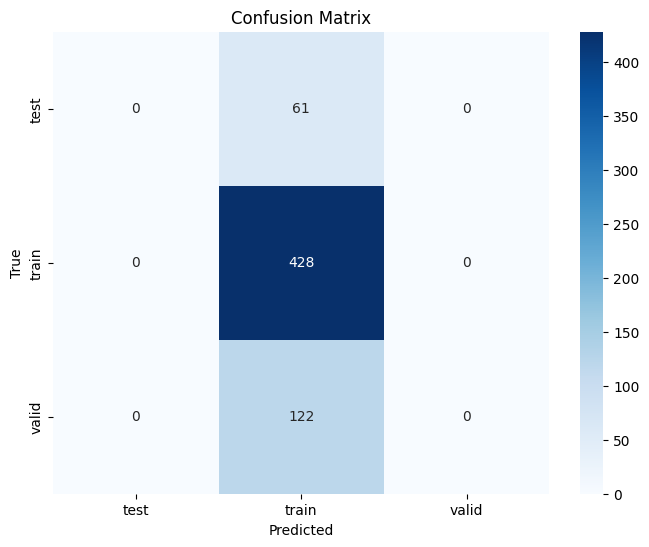

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

        test       0.00      0.00      0.00        61
       train       0.70      1.00      0.82       428
       valid       0.00      0.00      0.00       122

    accuracy                           0.70       611
   macro avg       0.23      0.33      0.27       611
weighted avg       0.49      0.70      0.58       611



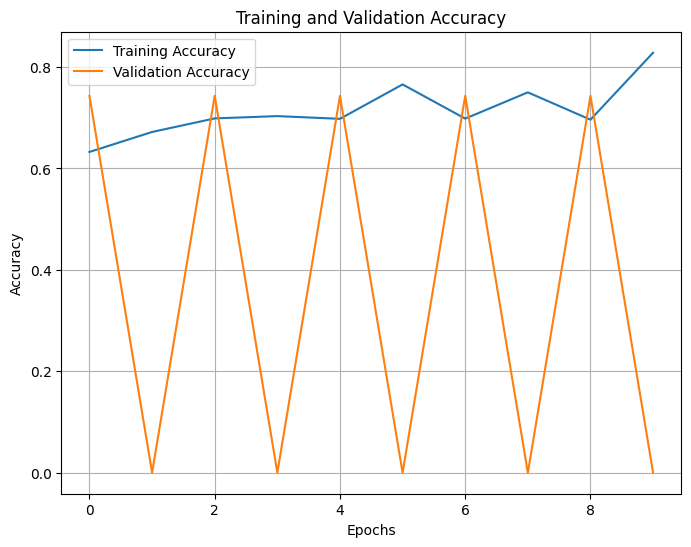

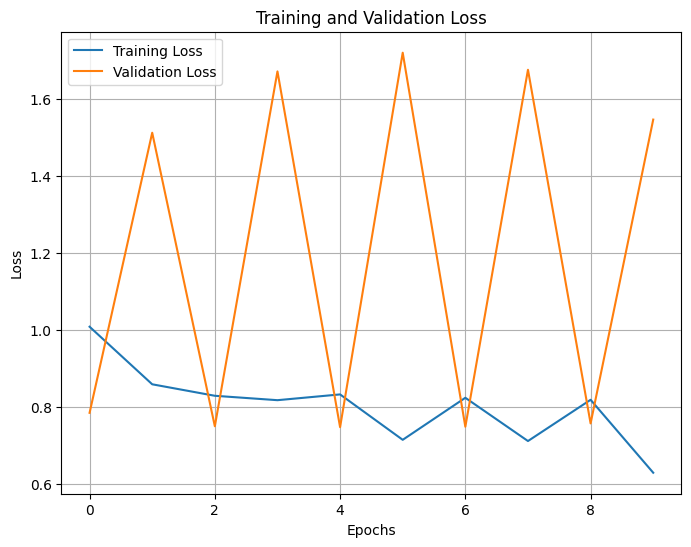

In [ ]:
# Plot Training and Validation Accuracy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys())
print("Classification Report:\n", report)


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 2453 images belonging to 3 classes.
Found 611 images belonging to 3 classes.
Class Names: ['test', 'train', 'valid']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,712,102 (17.98 MB)

 Trainable params: 2,010,931 (7.67 MB)

 Non-trainable params: 2,701,171 (10.30 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
77/77 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3643 - loss: 2.1847 - val_accuracy: 0.7005 - val_loss: 1.7736 - learning_rate: 1.0000e-05
Epoch 2/4
77/77 ━━━━━━━━━━━━━━━━━━━━ 43s 554ms/step - accuracy: 0.5957 - loss: 1.7497 - val_accuracy: 0.7005 - val_loss: 1.7144 - learning_rate: 1.0000e-05
Epoch 3/4
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 616ms/step - accuracy: 0.6444 - loss: 1.7164 - val_accuracy: 0.7005 - val_loss: 1.6958 - learning_rate: 1.0000e-05
Epoch 4/4
77/77 ━━━━━━━━━━━━━━━━━━━━ 75s 526ms/step - accuracy: 0.6334 - loss: 1.7103 - val_accuracy: 0.7005 - val_loss: 1.7304 - learning_rate: 1.0000e-05


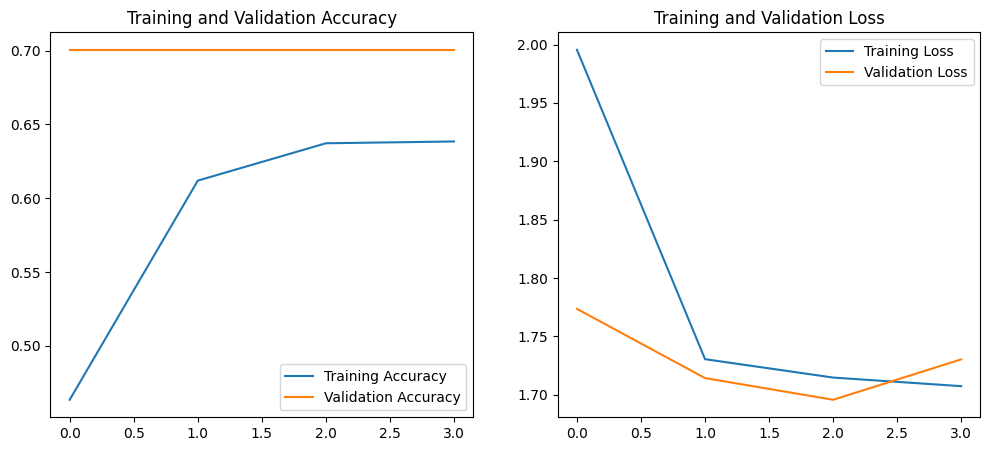

20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 694ms/step
Classification Report:
               precision    recall  f1-score   support

        test       0.00      0.00      0.00        61
       train       0.70      1.00      0.82       428
       valid       0.00      0.00      0.00       122

    accuracy                           0.70       611
   macro avg       0.23      0.33      0.27       611
weighted avg       0.49      0.70      0.58       611



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Final Model saved to Google Drive.


In [ ]:
# Install necessary libraries
!pip install tensorflow tensorflow-io scikit-learn

# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set Dataset Path
DATASET_PATH = '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8'

# Balanced Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_dataset = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_dataset = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

class_names = list(train_dataset.class_indices.keys())
print("Class Names:", class_names)

# Model Architecture with Fine-Tuning
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:-20]:
    layer.trainable = False

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7)
model_checkpoint = callbacks.ModelCheckpoint('/content/drive/MyDrive/best_brain_tumor_model.keras',
                                             monitor='val_accuracy',
                                             save_best_only=True)

# Train the Model
EPOCHS = 4
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=EPOCHS,
                    callbacks=[early_stop, lr_scheduler, model_checkpoint])

# Plot Training and Validation Accuracy/Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate and Report
val_preds = model.predict(val_dataset, verbose=1)
val_preds_classes = np.argmax(val_preds, axis=1)
val_labels = val_dataset.classes

print("Classification Report:\n", classification_report(val_labels, val_preds_classes, target_names=class_names))

# Save the Final Model
model.save('/content/drive/MyDrive/final_efficientnetb0_brain_tumor_model.keras')
print("Final Model saved to Google Drive.")


In [ ]:
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} - {layer.output.shape}")


0: efficientnetb0 - (None, 7, 7, 1280)
1: global_average_pooling2d - (None, 1280)
2: batch_normalization - (None, 1280)
3: dense - (None, 512)
4: dropout - (None, 512)
5: dense_1 - (None, 3)


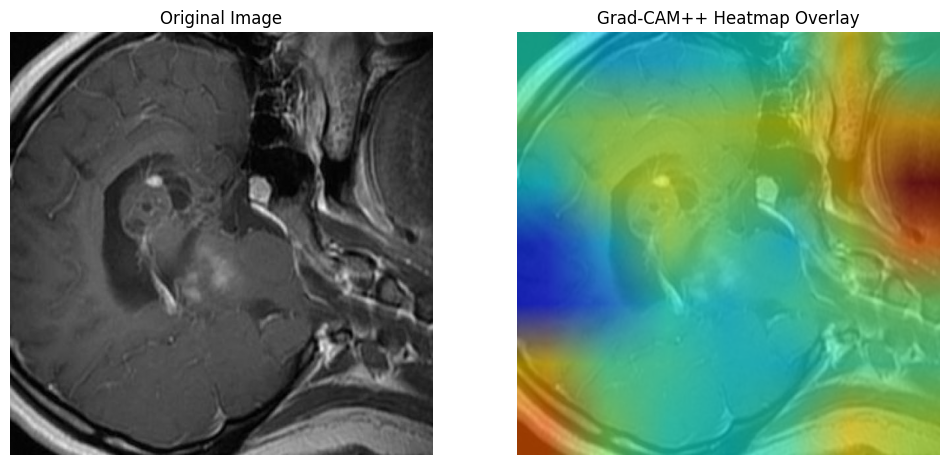

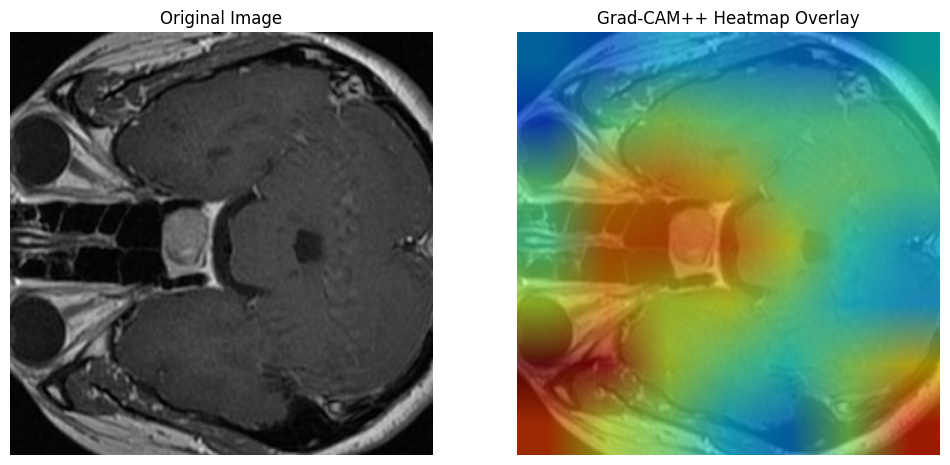

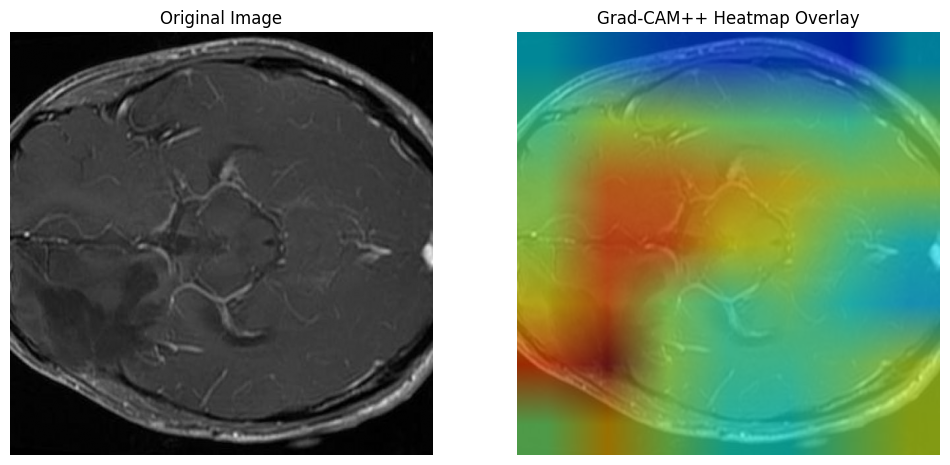

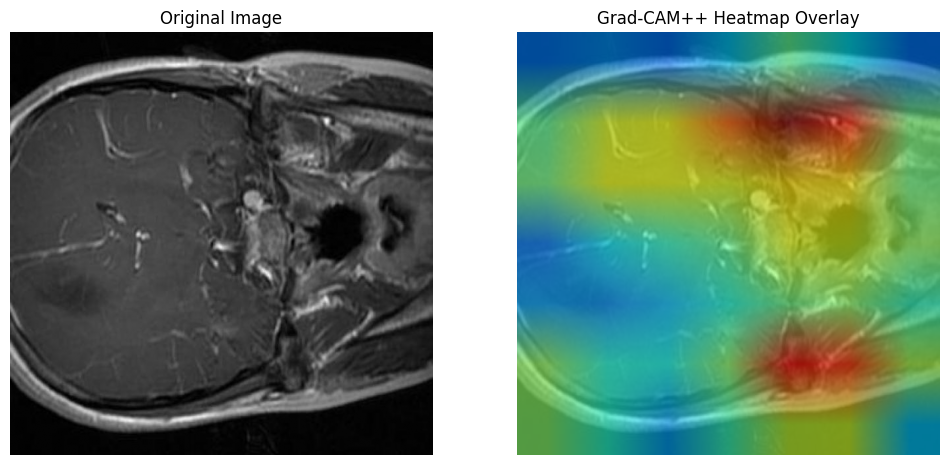

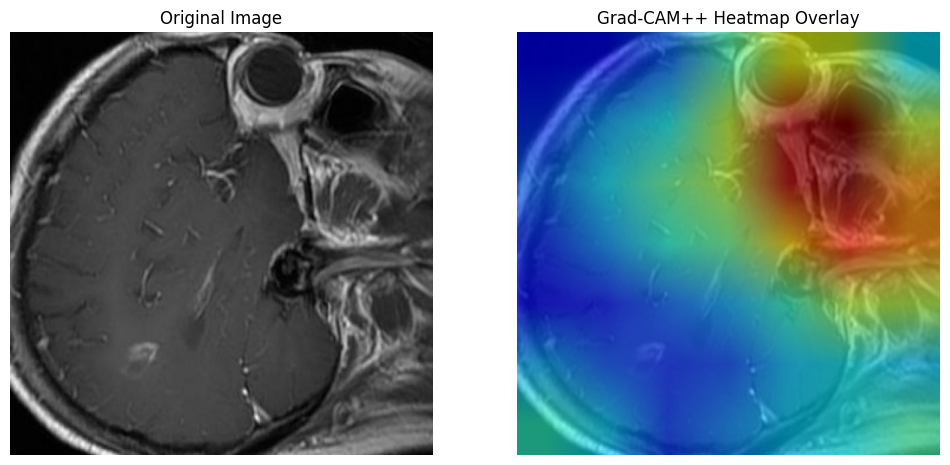

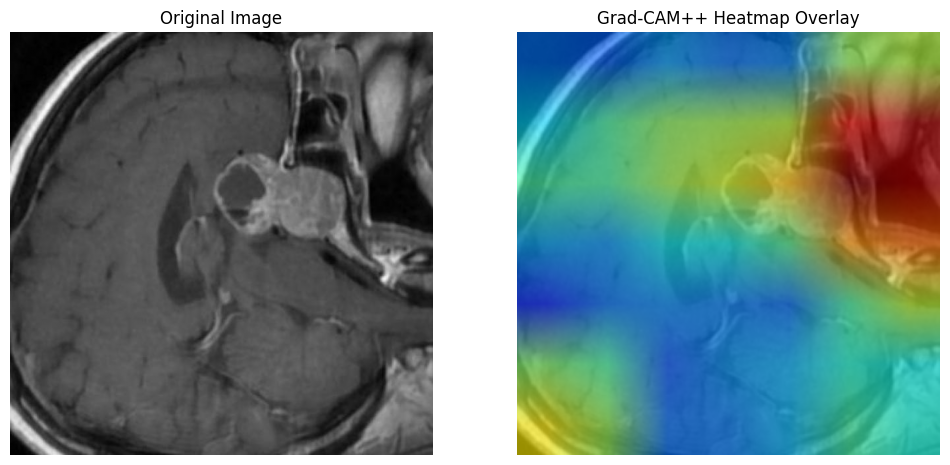

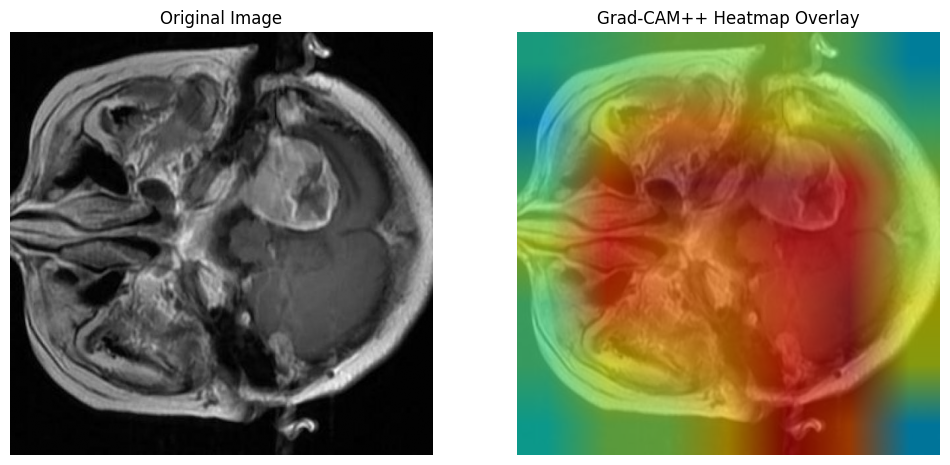

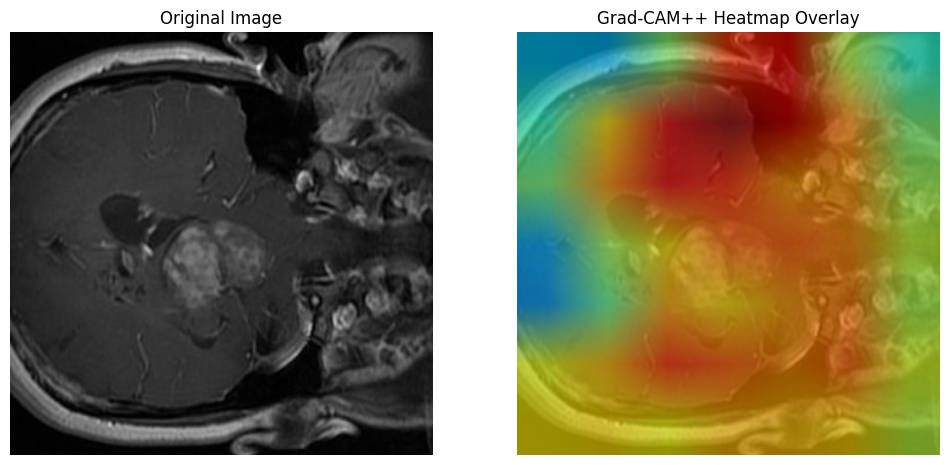

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ml/final_resnet_model.keras')

# 2. Grad-CAM++ Function
def grad_cam_plus(model, img_array, layer_name):
    """
    Generates Grad-CAM++ heatmap for a given image.
    """
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    grads = tf.maximum(grads, 0)  # Use only positive gradients
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    # Compute the Grad-CAM++ heatmap
    heatmap = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-8  # Normalize
    return heatmap

# 3. Overlay Heatmap on Image
def overlay_heatmap_on_image(img, heatmap, alpha=0.6, colormap='jet'):
    """
    Overlays a Grad-CAM++ heatmap on the original image.
    """
    # Normalize the heatmap to [0, 1]
    heatmap = np.maximum(heatmap, 0)
    heatmap /= heatmap.max()

    # Apply colormap
    colormap = plt.get_cmap(colormap)
    heatmap_colored = colormap(heatmap)[:, :, :3]  # Drop alpha channel

    # Resize the heatmap to match the image
    heatmap_resized = tf.image.resize(heatmap_colored, (img.shape[0], img.shape[1])).numpy()

    # Overlay heatmap on the original image
    overlayed_image = heatmap_resized * alpha + img / 255.0 * (1 - alpha)

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img / 255.0)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(overlayed_image)
    plt.title("Grad-CAM++ Heatmap Overlay")
    plt.axis('off')
    plt.show()

# 4. Load and preprocess images
def preprocess_image(img_path, target_size=(224, 224)):
    """
    Loads and preprocesses an image for the model.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    return img_array

# 5. Process images and generate Grad-CAM++
def process_images(image_paths, model, layer_name):
    """
    Processes a list of images and generates Grad-CAM++ heatmaps.
    """
    for img_path in image_paths:
        try:
            # Preprocess image
            img_array = preprocess_image(img_path)

            # Generate heatmap
            heatmap = grad_cam_plus(model, img_array, layer_name)

            # Convert preprocessed image back to uint8 for visualization
            original_img = image.load_img(img_path)
            original_img = np.array(original_img)

            # Overlay heatmap
            overlay_heatmap_on_image(original_img, heatmap)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# 6. Define image paths
image_paths = [
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2787_jpg.rf.fbb46cb24763021989bf94b86d2542d5.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1000_jpg.rf.1b33b0fbb604a406f23217a48f37b5c9.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1991_jpg.rf.0521261f95506758fc200bc90a9e45ce.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2341_jpg.rf.a868ae80ec6bf29c1fb2afc1ae691c49.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2750_jpg.rf.573ee7f2a5fa7839bfec85a43bf09a64.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1825_jpg.rf.ba6bbd8ff043b6cb3573958572bf9cc2.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/120_jpg.rf.823b543ece9f6e633b52d7c3d01a60c7.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2449_jpg.rf.e3e65e159bb4b3317a3eb88cb9004f3f.jpg'

]

# 7. Specify layer name (ensure it exists in the model)
layer_name = 'conv5_block3_out'  # Update based on your model's architecture

# 8. Run Grad-CAM++ on the images
process_images(image_paths, model, layer_name)


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/final_efficientnetb0_brain_tumor_model.keras')

# 2. Grad-CAM++ Function
def grad_cam_plus(model, img_array, layer_name):
    """
    Generates Grad-CAM++ heatmap for a given image.
    """
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    grads = tf.maximum(grads, 0)  # Use only positive gradients
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    # Compute the Grad-CAM++ heatmap
    heatmap = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-8  # Normalize
    return heatmap

# 3. Overlay Heatmap on Image
def overlay_heatmap_on_image(img, heatmap, alpha=0.6, colormap='jet'):
    """
    Overlays a Grad-CAM++ heatmap on the original image.
    """
    # Normalize the heatmap to [0, 1]
    heatmap = np.maximum(heatmap, 0)
    heatmap /= heatmap.max()

    # Apply colormap
    colormap = plt.get_cmap(colormap)
    heatmap_colored = colormap(heatmap)[:, :, :3]  # Drop alpha channel

    # Resize the heatmap to match the image
    heatmap_resized = tf.image.resize(heatmap_colored, (img.shape[0], img.shape[1])).numpy()

    # Overlay heatmap on the original image
    overlayed_image = heatmap_resized * alpha + img / 255.0 * (1 - alpha)

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img / 255.0)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(overlayed_image)
    plt.title("Grad-CAM++ Heatmap Overlay")
    plt.axis('off')
    plt.show()

# 4. Load and preprocess images
def preprocess_image(img_path, target_size=(224, 224)):
    """
    Loads and preprocesses an image for the model.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    return img_array

# 5. Process images and generate Grad-CAM++
def process_images(image_paths, model, layer_name):
    """
    Processes a list of images and generates Grad-CAM++ heatmaps.
    """
    for img_path in image_paths:
        try:
            # Preprocess image
            img_array = preprocess_image(img_path)

            # Generate heatmap
            heatmap = grad_cam_plus(model, img_array, layer_name)

            # Convert preprocessed image back to uint8 for visualization
            original_img = image.load_img(img_path)
            original_img = np.array(original_img)

            # Overlay heatmap
            overlay_heatmap_on_image(original_img, heatmap)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# 6. Define image paths
image_paths = [
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1636_jpg.rf.45388a43e9ab29e8358faf06424999b0.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1000_jpg.rf.1b33b0fbb604a406f23217a48f37b5c9.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1991_jpg.rf.0521261f95506758fc200bc90a9e45ce.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2341_jpg.rf.a868ae80ec6bf29c1fb2afc1ae691c49.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2750_jpg.rf.573ee7f2a5fa7839bfec85a43bf09a64.jpg',
    '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1825_jpg.rf.ba6bbd8ff043b6cb3573958572bf9cc2.jpg',

]

# 7. Specify layer name (ensure it exists in the model)
layer_name = 'efficientnetb0'  # Update based on your model's architecture

# 8. Run Grad-CAM++ on the images
process_images(image_paths, model, layer_name)


Error processing /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1636_jpg.rf.45388a43e9ab29e8358faf06424999b0.jpg: The layer sequential has never been called and thus has no defined input.
Error processing /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1000_jpg.rf.1b33b0fbb604a406f23217a48f37b5c9.jpg: The layer sequential has never been called and thus has no defined input.
Error processing /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/1991_jpg.rf.0521261f95506758fc200bc90a9e45ce.jpg: The layer sequential has never been called and thus has no defined input.
Error processing /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2341_jpg.rf.a868ae80ec6bf29c1fb2afc1ae691c49.jpg: The layer sequential has never been called and thus has no defined input.
Error processing /content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8/valid/images/2750_jpg.rf.573ee7f2a5fa7839bfec85a43bf09a64.jpg: The layer sequentia

In [ ]:
import tensorflow as tf

# 1. Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ml/final_resnet_model.keras')

# 2. Modify the output layer if necessary
if model.output_shape[-1] != 2:  # Assuming you need 2 output classes
    previous_layer_output = model.layers[-2].output

    # Add a dropout layer for regularization
    dropout_layer = tf.keras.layers.Dropout(0.5)(previous_layer_output)

    # Add a new Dense layer for the output
    new_output = tf.keras.layers.Dense(2, activation='softmax')(dropout_layer)

    # Build a new model using the functional API
    model = tf.keras.models.Model(inputs=model.input, outputs=new_output)

# Recompile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Fine-tuning learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 3. Load and preprocess the validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/brain_tumor_dataset/BrainTumorYolov8/valid',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

# Extract class names before applying transformations
class_names = validation_dataset.class_names
print("Class names:", class_names)

# Optional: Normalize the dataset (rescale pixel values to [0, 1])
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

# Cache, shuffle, and prefetch the dataset for better performance
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 4. Verify dataset labels
for images, labels in validation_dataset.take(1):
    print("Sample Labels:", labels.numpy())

# 5. Evaluate the model
loss, accuracy = model.evaluate(validation_dataset)

# 6. Print the results
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Found 612 files belonging to 2 classes.
Class names: ['images', 'labels']
Sample Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
20/20 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.9865 - loss: 0.6761
Validation Loss: 0.6763
Validation Accuracy: 99.02%



0: 640x640 1 meningioma, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Tumor Detected: meningioma
Bounding Box: (381, 390) -> (524, 556)
Width: 143 pixels, Height: 166 pixels, Area: 23738 pixels², Radius: 86 pixels


0: 640x640 2 gliomas, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Tumor Detected: glioma
Bounding Box: (23, 324) -> (210, 475)
Width: 187 pixels, Height: 151 pixels, Area: 28237 pixels², Radius: 94 pixels

Tumor Detected: glioma
Bounding Box: (23, 327) -> (212, 534)
Width: 189 pixels, Height: 207 pixels, Area: 39123 pixels², Radius: 111 pixels


0: 640x640 (no detections), 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Tumor Detected: glioma
Bounding Box: (87, 294) -> (188, 368)
Width

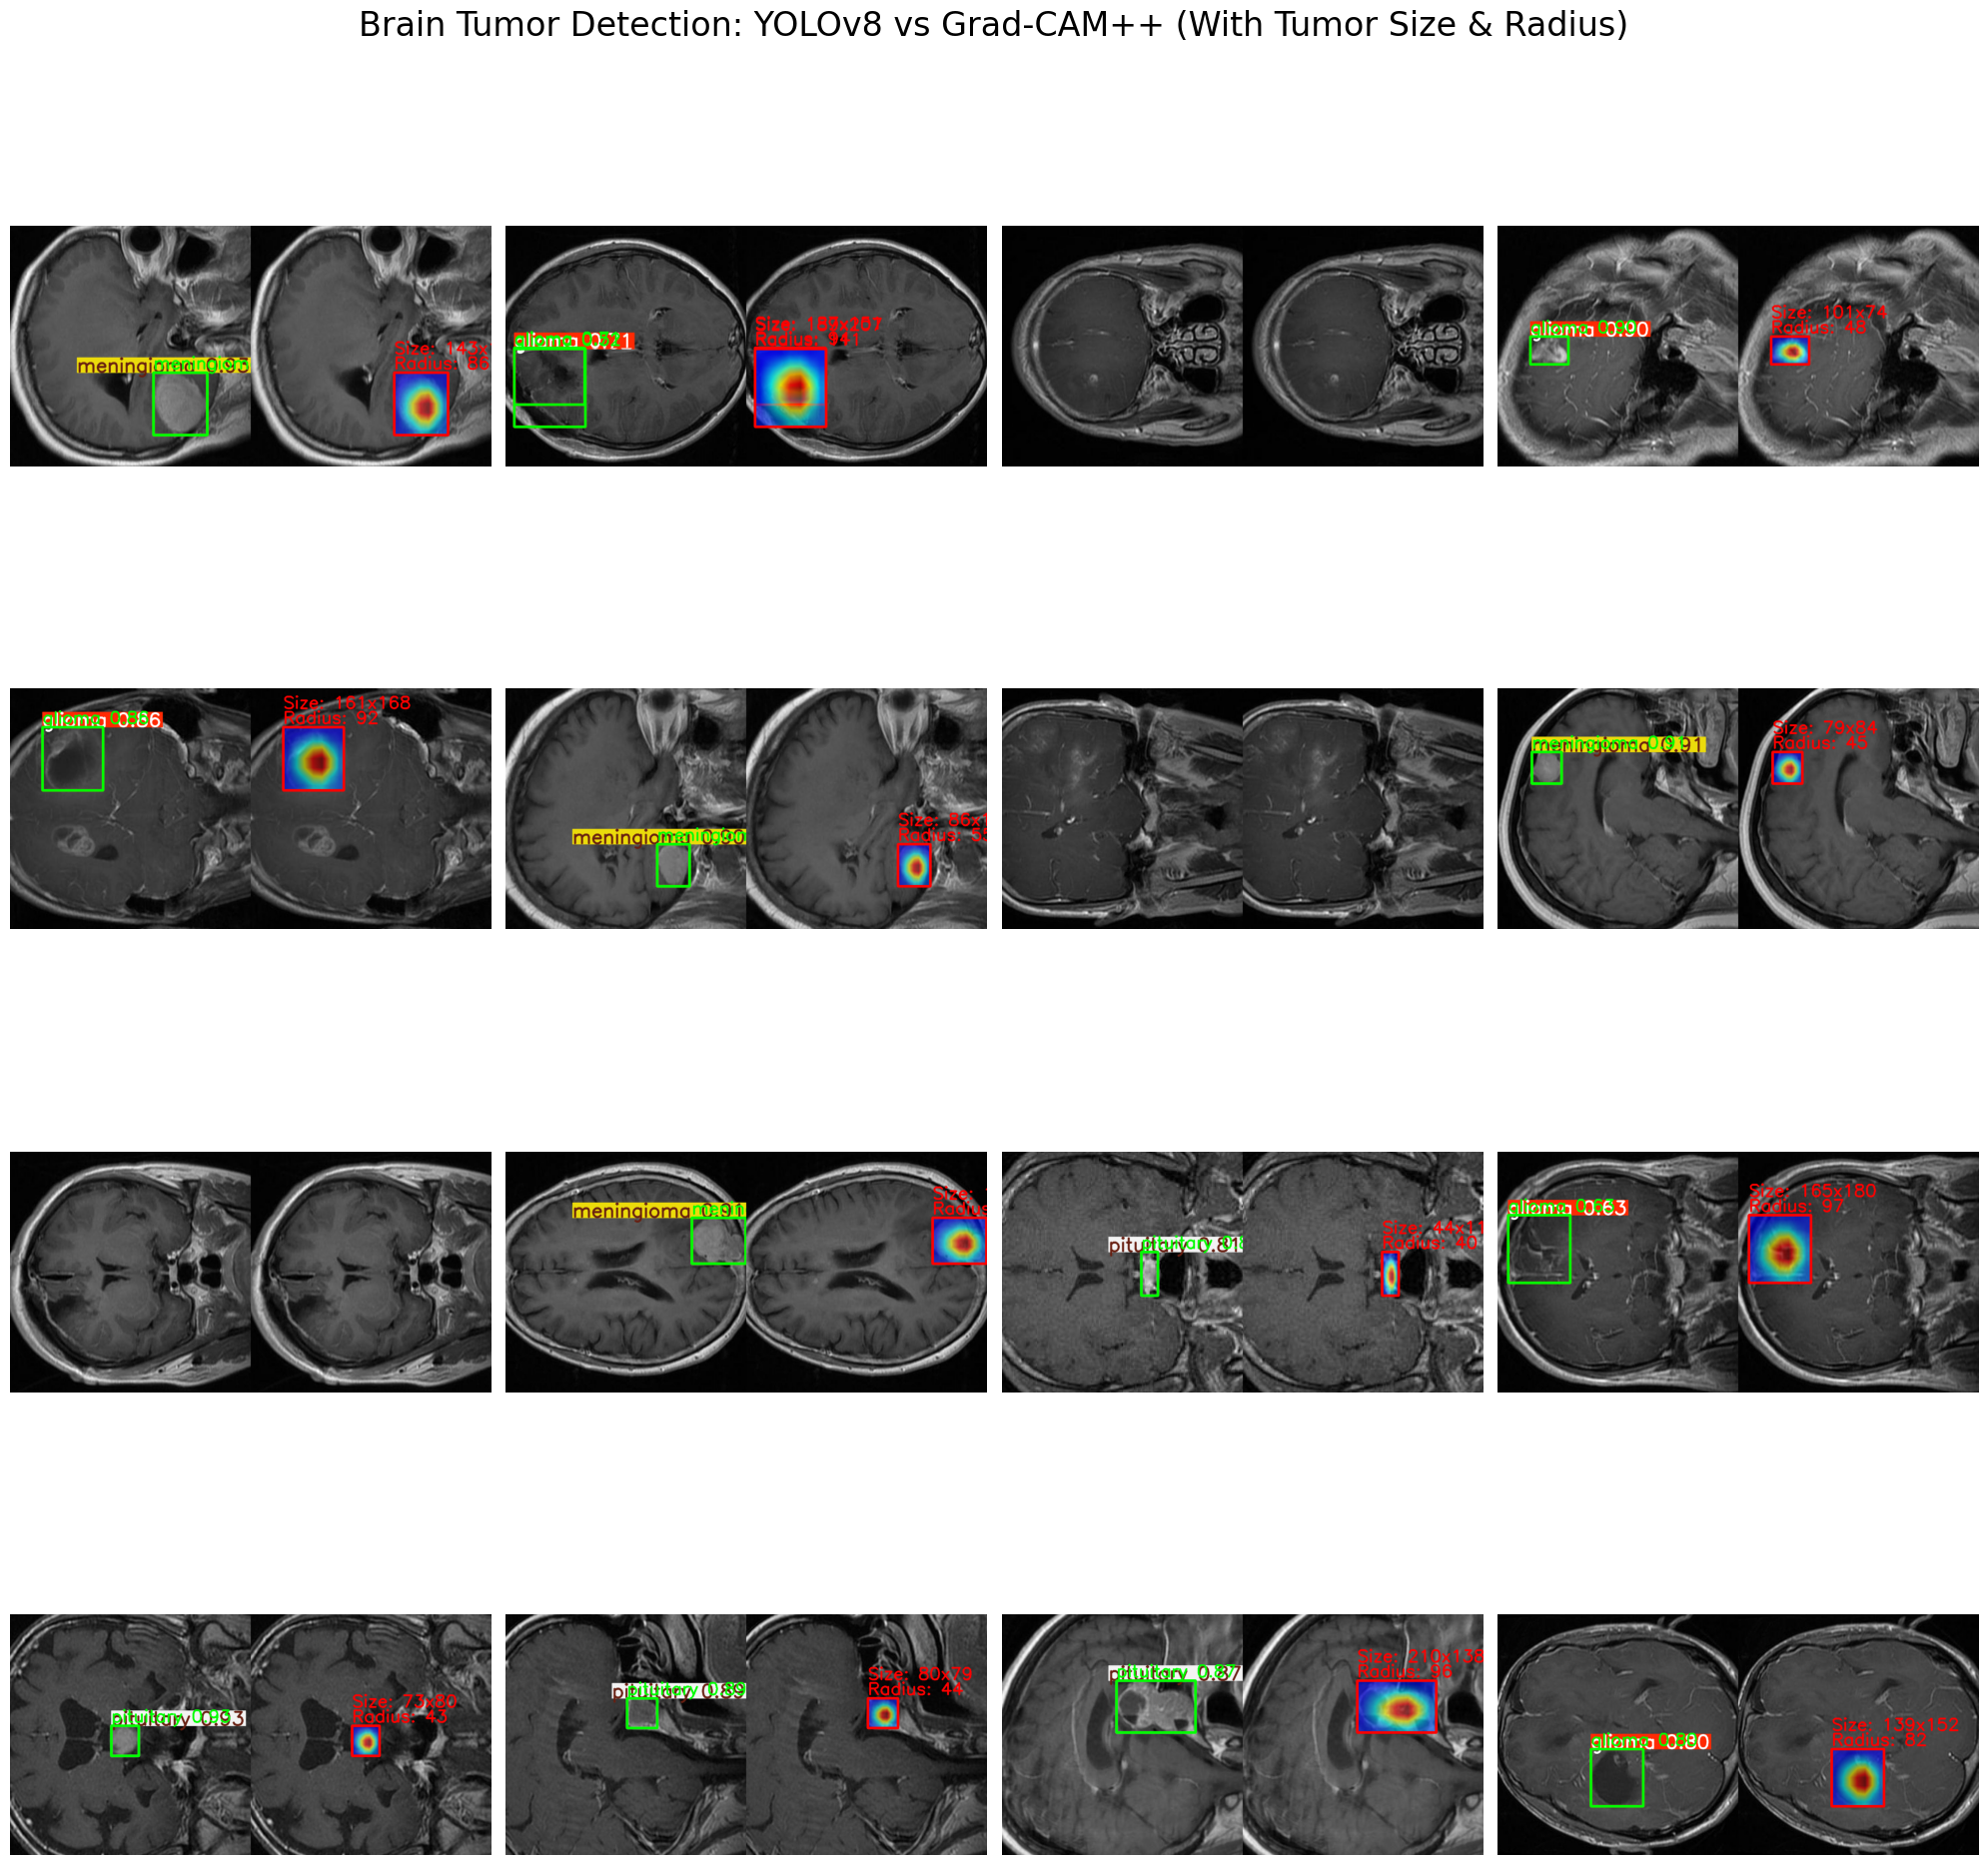

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow.keras.preprocessing import image

# Load YOLOv8 model
yolo_model = YOLO('/content/drive/MyDrive/runs_yolo/runs/detect/train3/weights/best.pt')

# Load pre-trained CNN model for Grad-CAM++
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/ml/final_resnet_model.keras')

# Normalize function
def normalize_image(image):
    return image / 255.0

# Resize function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Grad-CAM++ function with bounding box focus
def grad_cam_plus(model, img_array, layer_name):
    img_array = np.expand_dims(img_array, axis=0)
    grad_model = tf.keras.models.Model(inputs=model.input, outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    grads = tf.maximum(grads, 0)
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-8  # Normalize
    return heatmap

# Overlay heatmap inside bounding box
def overlay_heatmap_on_bbox(img, heatmap, bbox, alpha=0.6):
    x1, y1, x2, y2 = bbox
    heatmap_resized = cv2.resize(heatmap, (x2 - x1, y2 - y1))

    # Apply red colormap
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_resized = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    # Blend only inside bounding box
    overlay = img.copy()
    overlay[y1:y2, x1:x2] = cv2.addWeighted(img[y1:y2, x1:x2], 1 - alpha, heatmap_resized, alpha, 0)

    return overlay

# Preprocess image for Grad-CAM++
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    return img_array

# Main function
def main():
    dataset_path = '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8'
    valid_images_path = os.path.join(dataset_path, 'test', 'images')

    image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

    if len(image_files) == 0:
        print("No images found.")
        return

    num_images = len(image_files)
    step_size = max(1, num_images // 16)
    selected_images = [image_files[i] for i in range(0, num_images, step_size)][:16]

    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle('Brain Tumor Detection: YOLOv8 vs Grad-CAM++ (With Tumor Size & Radius)', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            try:
                image_orig = cv2.imread(image_path)
                if image_orig is None:
                    print(f"Failed to load: {image_path}")
                    continue

                image_resized = resize_image(image_orig, size=(640, 640))
                normalized_image = normalize_image(image_resized)

                # YOLOv8 inference
                results = yolo_model.predict(source=image_resized, imgsz=640, conf=0.5)
                annotated_image = results[0].plot(line_width=5)  # Thicker bounding box
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

                # Apply Grad-CAM++ only inside detected tumor bounding boxes
                overlayed_image = image_resized.copy()

                for box in results[0].boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
                    label = results[0].names[int(box.cls)]
                    text = f"{label} {box.conf[0]:.2f}"

                    # Calculate tumor size
                    width = x2 - x1
                    height = y2 - y1
                    area = width * height

                    # Calculate radius (approximate as circle with similar area)
                    radius = int(np.sqrt(area / np.pi))

                    print(f"Tumor Detected: {label}")
                    print(f"Bounding Box: ({x1}, {y1}) -> ({x2}, {y2})")
                    print(f"Width: {width} pixels, Height: {height} pixels, Area: {area} pixels², Radius: {radius} pixels\n")

                    # Extract bounding box region
                    bbox_crop = image_resized[y1:y2, x1:x2]

                    # Process only if valid region
                    if bbox_crop.shape[0] > 0 and bbox_crop.shape[1] > 0:
                        bbox_crop_resized = cv2.resize(bbox_crop, (224, 224))  # Resize for CNN model
                        img_array = normalize_image(bbox_crop_resized)

                        # Compute Grad-CAM++ heatmap for bounding box
                        heatmap = grad_cam_plus(cnn_model, img_array, 'conv5_block3_out')

                        # Overlay Grad-CAM++ heatmap inside the bounding box
                        overlayed_image = overlay_heatmap_on_bbox(overlayed_image, heatmap, (x1, y1, x2, y2))

                        # Draw bounding box
                        cv2.rectangle(overlayed_image, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Thicker bounding box
                        cv2.putText(overlayed_image, f"Size: {width}x{height}", (x1, y1 - 50),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4)  # Bigger text
                        cv2.putText(overlayed_image, f"Radius: {radius}", (x1, y1 - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4)  # Bigger text

                    # Draw bounding box for YOLOv8
                    cv2.rectangle(annotated_image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Thicker bounding box
                    cv2.putText(annotated_image_rgb, text, (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 4)  # Bigger text

                # Display YOLOv8 and Grad-CAM++ results side by side
                combined_image = np.hstack((annotated_image_rgb, overlayed_image))
                ax.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))

            except Exception as e:
                print(f"Error processing {image_path}: {e}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Run script
if __name__ == "__main__":
    main()


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from ultralytics import YOLO
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image

# Load YOLOv8 model (Ensure correct path)
yolo_model = YOLO('/content/drive/MyDrive/runs_yolo/runs/detect/train3/weights/best.pt')

# Load pre-trained CNN model for Grad-CAM++
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/ml/final_resnet_model.keras')

# Define class names (Ensure they match your dataset)
CLASS_NAMES = ['glioma', 'meningioma', 'pituitary', 'no_tumor']

# Dataset paths
dataset_path = '/content/brain_tumor_dataset/BrainTumor/BrainTumorYolov8'
test_images_path = os.path.join(dataset_path, 'test', 'images')
test_labels_path = os.path.join(dataset_path, 'test', 'labels')

# Initialize lists for classification report
y_true = []  # Ground truth labels
y_pred = []  # Model predictions

# Lower confidence threshold to improve pituitary detection
CONFIDENCE_THRESHOLD = 0.15

# Process test images
for image_file in os.listdir(test_images_path):
    if not image_file.endswith('.jpg'):
        continue

    image_path = os.path.join(test_images_path, image_file)

    # Load and preprocess image
    image_orig = cv2.imread(image_path)
    image_resized = cv2.resize(image_orig, (640, 640))

    # YOLOv8 inference
    results = yolo_model.predict(source=image_resized, imgsz=640, conf=CONFIDENCE_THRESHOLD)

    # Extract YOLO prediction
    predicted_labels = set()  # Store detected class names
    for box in results[0].boxes:
        class_idx = int(box.cls)
        predicted_labels.add(CLASS_NAMES[class_idx])  # Convert class index to label

    # Read ground truth label
    label_file = os.path.join(test_labels_path, image_file.replace('.jpg', '.txt'))
    true_labels = set()

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f.readlines():
                class_idx = int(line.split()[0])
                true_labels.add(CLASS_NAMES[class_idx])

    # Assign ground truth and predicted labels
    if len(true_labels) > 0:
        y_true.append(list(true_labels)[0])  # Assume one label per image
    else:
        y_true.append('no_tumor')  # Default if no label found

    if len(predicted_labels) > 0:
        y_pred.append(list(predicted_labels)[0])  # Assume one prediction per image
    else:
        y_pred.append('no_tumor')

# Generate Classification Report
report = classification_report(y_true, y_pred, target_names=CLASS_NAMES)
print(report)




0: 640x640 1 meningioma, 12.8ms
Speed: 3.0ms preprocess, 12.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 meningioma, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 12.8ms
Speed: 2.4ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1